In [18]:
%load_ext autoreload
%autoreload 2

import sys
import os
import numpy as np
from pathlib import Path

# Add the parent directory to sys.path to access src
sys.path.append(str(Path(os.getcwd()).parent))

from src.color_code_stim.color_code import ColorCode

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
cc = ColorCode(d=3, rounds=3, circuit_type="tri", p_circuit=1e-3, comparative_decoding=True)
det, obs = cc.sample(10000)
preds = cc.decode(det, erasure_matcher_predecoding=True, verbose=True)
print()
print("# failures:", preds.sum())

First-round decoding:
    > logical class 0, color r...
    > logical class 0, color g...
    > logical class 0, color b...
    > logical class 1, color r...
    > logical class 1, color g...
    > logical class 1, color b...
Erasure matcher predecoding:
    > # of samples with successful predecoding: 8600
Second-round decoding:
    > logical class 0, color r...
    > logical class 0, color g...
    > logical class 0, color b...
    > logical class 1, color r...
    > logical class 1, color g...
    > logical class 1, color b...
Merging predecoding & second-round decoding outcomes

# failures: 478


In [ ]:
cc = ColorCode(d=5, rounds=5, circuit_type="tri", p_circuit=3e-3, comparative_decoding=True)

det, obs = cc.sample(100_000, seed=0)
preds1, extra_outputs1 = cc.decode(
    det, erasure_matcher_predecoding=False, full_output=True
)
nfails1 = np.sum(preds1 != obs)
preds2, extra_outputs2 = cc.decode(
    det, erasure_matcher_predecoding=True, full_output=True
)
nfails2 = np.sum(preds2 != obs)
# preds3, extra_outputs3 = cc.decode(
#     det,
#     erasure_matcher_predecoding=True,
#     full_output=True,
#     partial_correction_by_predecoding=True,
# )
# nfails3 = np.sum(preds3 != obs)

print("Original: ")
print(nfails1)
print("Erasure matcher: ")
print(nfails2)
# print('Erasure matcher with partial correction: ')
# print(nfails3)

Original: 
5308
Erasure matcher: 
5295


In [47]:
N = round(1e6)
cc = ColorCode(d=5, rounds=1, circuit_type="tri", p_bitflip=1e-2, comparative_decoding=True)
preds1, extra_outputs1 = cc.simulate(N, seed=0)
preds2, extra_outputs2 = cc.simulate(N, erasure_matcher_predecoding=True, seed=0)
print(preds1)
print(preds2)

UnboundLocalError: cannot access local variable 'extra_outputs' where it is not associated with a value

In [ ]:
cc = ColorCode(d=7, rounds=1, circuit_type="tri", p_bitflip=5e-2, comparative_decoding=True)
det, obs, err = cc.sample_with_errors(shots=10000, seed=0)
print("> no partial correction")
pred, extra_outputs = cc.decode(
    det,
    full_output=True,
    erasure_matcher_predecoding=True,
    partial_correction_by_predecoding=False,
)
fail = obs ^ pred
print(fail.sum())

print("> with partial correction")
pred2, extra_outputs2 = cc.decode(
    det,
    full_output=True,
    erasure_matcher_predecoding=True,
    partial_correction_by_predecoding=True,
)
fail2 = obs ^ pred2
print(fail2.sum())

> no partial correction
167
> with partial correction
246


In [139]:
samples = np.nonzero(~fail & fail2)[0]
idx = samples[1]
idx

95

<Axes: >

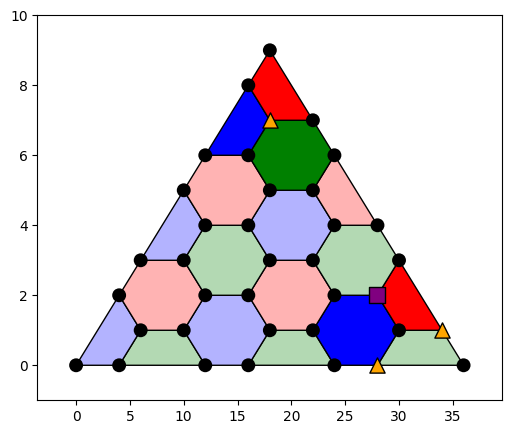

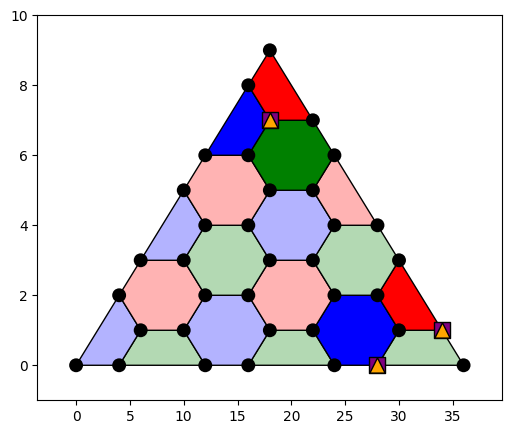

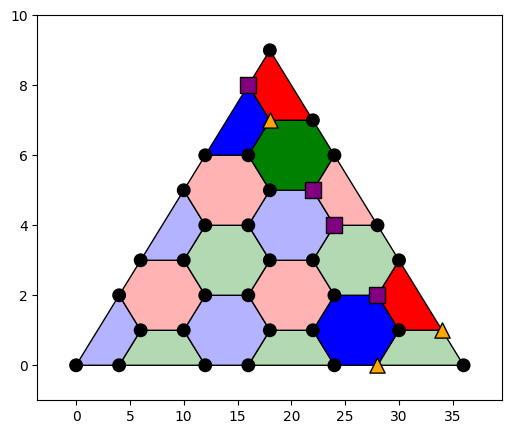

In [140]:
error_qubits = np.nonzero(cc.errors_to_qubits(err[idx]))[0]
dets = np.nonzero(det[idx])[0]

preds_predecoding = np.nonzero(
    cc.errors_to_qubits(extra_outputs["predecoding_error_preds"][idx])
)[0]
cc.draw_lattice(
    show_axes=True,
    highlight_qubits=error_qubits,
    highlight_qubits2=preds_predecoding,
    highlight_faces=dets,
)

corr_qubits = np.nonzero(cc.errors_to_qubits(extra_outputs["error_preds"][idx]))[0]
cc.draw_lattice(
    show_axes=True,
    highlight_qubits=error_qubits,
    highlight_qubits2=corr_qubits,
    highlight_faces=dets,
)
corr_qubits2 = np.nonzero(cc.errors_to_qubits(extra_outputs2["error_preds"][idx]))[0]
cc.draw_lattice(
    show_axes=True,
    highlight_qubits=error_qubits,
    highlight_qubits2=corr_qubits2,
    highlight_faces=dets,
)